IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

LOADING DATASETS

In [11]:
df = pd.read_csv('data/soil.csv')
hf = pd.read_csv('data/Sub_Division_IMD_2017.csv')

CHECKING THE PARAMETERS

In [ ]:
df.head()

In [ ]:
hf.head()

REMOVING MISSING DATASETS


In [ ]:
hf.isna().sum()
hf.isnull().sum()

In [ ]:
hf = hf.dropna()
df = df.dropna()
df.isna().sum()
hf.isna().sum()

'hf = hf.dropna()\ndf = df.dropna()\ndf.isna().sum()\nhf.isna().sum()'

In [ ]:
hf.isna().sum()

In [ ]:
df.isna().sum()

In [29]:
df.duplicated().sum()
hf.duplicated().sum()

0

In [ ]:
df.info()


In [ ]:
hf.info()

In [ ]:
df.describe()

In [ ]:
hf.describe()

In [ ]:
#defining columns
numeric_features=[feature for feature in df.columns if df[feature].dtypes!='O']

catagorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']


#printing columns
print('we have {} Numeric Features: {}'.format(len(numeric_features),numeric_features))
print('we have {} Catagorical Features: {}'.format(len(catagorical_features),catagorical_features))

"#defining columns\nnumeric_features=[feature for feature in df.columns if df[feature].dtypes!='O']\n\ncatagorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']\n\n\n#printing columns\nprint('we have {} Numeric Features: {}'.format(len(numeric_features),numeric_features))\nprint('we have {} Catagorical Features: {}'.format(len(catagorical_features),catagorical_features))"

In [34]:
numeric_features=[feature for feature in hf.columns if hf[feature].dtypes!='O']
catagorical_features=[feature for feature in hf.columns if hf[feature].dtypes=='O']

print('we have {} Numeric Features: {}'.format(len(numeric_features),numeric_features))
print('we have {} Catagorical Features: {}'.format(len(catagorical_features),catagorical_features))

we have 18 Numeric Features: ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']
we have 1 Catagorical Features: ['SUBDIVISION']


In [ ]:
districts = hf['District ']

# Print districts
print(districts)

# Optional: Save districts to a new CSV
districts.to_frame().to_csv('Districts.csv', index=False)

"districts = hf['District ']\n\n# Print districts\nprint(districts)\n\n# Optional: Save districts to a new CSV\ndistricts.to_frame().to_csv('Districts.csv', index=False)"

In [ ]:
#import pandas as pd
#import numpy as np

# Read the CSV file with error handling
try:
    df = pd.read_csv('data\Sub_Division_IMD_2017.csv')
except FileNotFoundError:
    print("Error: File 'Sub_Division_IMD_2017.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty.")
    exit()

# Verify column existence
if 'SUBDIVISION' not in df.columns:
    print("Error: 'SUBDIVISION' column not found in the CSV.")
    print("Available columns:", list(df.columns))
    exit()

# Get unique subdivisions safely
try:
    unique_subdivisions = df['SUBDIVISION'].dropna().unique()
except Exception as e:
    print(f"Error accessing SUBDIVISION column: {e}")
    exit()

# Print unique subdivisions for user selection
print("Available Subdivisions:")
for i, subdivision in enumerate(unique_subdivisions, 1):
    print(f"{i}. {subdivision}")

# Prompt user to select a subdivision
while True:
    try:
        selection = int(input("\nEnter the number of the subdivision you want to analyze: "))
        selected_subdivision = unique_subdivisions[selection - 1]
        break
    except (ValueError, IndexError):
        print("Invalid selection. Please try again.")

# Identify monthly columns dynamically
numeric_columns = df.select_dtypes(include=[np.number]).columns
monthly_columns = [col for col in numeric_columns if col not in ['District ', 'SUBDIVISION']]

# Filter data for the selected subdivision
subdivision_data = df[df['SUBDIVISION'] == selected_subdivision]

# Calculate sum and average of monthly data
subdivision_sum = subdivision_data[monthly_columns].sum()
subdivision_average = subdivision_sum / len(subdivision_data)

print(f"\nAnalysis for {selected_subdivision}:")
print("Monthly Sum:", subdivision_sum)
print("Monthly Average:", subdivision_average)

# Optional: Save results
results_df = pd.DataFrame({
    'Monthly_Sum': subdivision_sum,
    'Monthly_Average': subdivision_average
})
results_df.to_csv(f'{selected_subdivision}_analysis.csv', index=True)

'import pandas as pd\nimport numpy as np\n\n# Read the CSV file with error handling\ntry:\n    df = pd.read_csv(\'data\\Sub_Division_IMD_2017.csv\')\nexcept FileNotFoundError:\n    print("Error: File \'Sub_Division_IMD_2017.csv\' not found.")\n    exit()\nexcept pd.errors.EmptyDataError:\n    print("Error: The CSV file is empty.")\n    exit()\n\n# Verify column existence\nif \'SUBDIVISION\' not in df.columns:\n    print("Error: \'SUBDIVISION\' column not found in the CSV.")\n    print("Available columns:", list(df.columns))\n    exit()\n\n# Get unique subdivisions safely\ntry:\n    unique_subdivisions = df[\'SUBDIVISION\'].dropna().unique()\nexcept Exception as e:\n    print(f"Error accessing SUBDIVISION column: {e}")\n    exit()\n\n# Print unique subdivisions for user selection\nprint("Available Subdivisions:")\nfor i, subdivision in enumerate(unique_subdivisions, 1):\n    print(f"{i}. {subdivision}")\n\n# Prompt user to select a subdivision\nwhile True:\n    try:\n        selection =

In [53]:
#calculating the average of the data
monthly_columns = hf.columns[3:15]  # Adjust column indices if needed
hf['Mean_Rainfall'] = hf[monthly_columns].mean(axis=1)

# Optional: Save results to a new CSV
hf.to_csv('Sub_Division_Rainfall_with_Mean.csv', index=False)

# Print mean rainfall for each district
print(hf[['District ', 'Mean_Rainfall']])

KeyError: "['District '] not in index"

In [ ]:
#import pandas as pd
#import numpy as np

# Read the CSV file with error handling
try:
    df = pd.read_csv('data/Sub_Division_IMD_2017.csv')
except FileNotFoundError:
    print("Error: File 'Sub_Division_IMD_2017.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty.")
    exit()

# Verify column existence
if 'SUBDIVISION' not in df.columns:
    print("Error: 'SUBDIVISION' column not found in the CSV.")
    print("Available columns:", list(df.columns))
    exit()

# Get unique subdivisions safely
try:
    unique_subdivisions = df['SUBDIVISION'].dropna().unique()
except Exception as e:
    print(f"Error accessing SUBDIVISION column: {e}")
    exit()

# Print unique subdivisions for user selection
print("Available Subdivisions:")
for i, subdivision in enumerate(unique_subdivisions, 1):
    print(f"{i}. {subdivision}")

# Prompt user to select a subdivision
while True:
    try:
        selection = int(input("\nEnter the number of the subdivision you want to analyze: "))
        selected_subdivision = unique_subdivisions[selection - 1]
        break
    except (ValueError, IndexError):
        print("Invalid selection. Please try again.")

# Select columns from index 3 to 15 (adjust if needed)
monthly_columns = df.columns[3:15]

# Filter data for the selected subdivision
subdivision_data = df[df['SUBDIVISION'] == selected_subdivision]

# Calculate monthly and yearly averages
def calculate_yearly_averages(data):
    # Initialize results dictionary
    yearly_averages = {}
    
    # Calculate average for each year's data
    for index, row in data.iterrows():
        year_data = row[monthly_columns]
        yearly_averages[index] = year_data.mean()
    
    return yearly_averages

# Compute yearly averages
yearly_averages = calculate_yearly_averages(subdivision_data)

# Print results
print(f"\nYearly Averages for {selected_subdivision}:")
for index, avg in yearly_averages.items():
    print(f"Row {index}: {avg}")

# Calculate overall monthly averages for the subdivision
monthly_averages = subdivision_data[monthly_columns].mean()

# Save results
results_df = pd.DataFrame.from_dict(
    {
        'Yearly_Averages': list(yearly_averages.values()),
        'Row_Indices': list(yearly_averages.keys())
    }
)
results_df.to_csv(f'{selected_subdivision}_yearly_analysis.csv', index=False)

# Optional: More detailed statistical analysis
print("\nMonthly Average Statistics:")
print(subdivision_data[monthly_columns].describe())

'try:\n    df = pd.read_csv(\'data/Sub_Division_IMD_2017.csv\')\nexcept FileNotFoundError:\n    print("Error: File \'Sub_Division_IMD_2017.csv\' not found.")\n    exit()\nexcept pd.errors.EmptyDataError:\n    print("Error: The CSV file is empty.")\n    exit()\n\n# Verify column existence\nif \'SUBDIVISION\' not in df.columns:\n    print("Error: \'SUBDIVISION\' column not found in the CSV.")\n    print("Available columns:", list(df.columns))\n    exit()\n\n# Get unique subdivisions safely\ntry:\n    unique_subdivisions = df[\'SUBDIVISION\'].dropna().unique()\nexcept Exception as e:\n    print(f"Error accessing SUBDIVISION column: {e}")\n    exit()\n\n# Print unique subdivisions for user selection\nprint("Available Subdivisions:")\nfor i, subdivision in enumerate(unique_subdivisions, 1):\n    print(f"{i}. {subdivision}")\n\n# Prompt user to select a subdivision\nwhile True:\n    try:\n        selection = int(input("\nEnter the number of the subdivision you want to analyze: "))\n        s

Available Districts:
1. Anantapur
2. Chittoor
3. East Godavari
4. Guntur
5. Krishna
6. Kurnool
7. Prakasam
8. Nellore
9. Srikakulam
10. Visakhapatanam
11. Vizianagaram
12. West Godavari
13. Y.S.R.
14. Nicobars
15. North And Middle Andaman
16. South Andamans
17. Anjaw
18. Changlang
19. Dibang Valley
20. East Kameng
21. East Siang
22. Kra Daadi
23. Kurung Kumey
24. Lohit
25. Lower Dibang Valley
26. Lower Subansiri
27. NAMSAI
28. Papum Pare
29. Tawang
30. Tirap
31. Upper Siang
32. Upper Subansiri
33. West Kameng
34. West Siang
35. Baksa
36. Barpeta
37. Biswanath
38. Bongaigaon
39. Cachar
40. Charaideo
41. Chirang
42. Darrang
43. Dhemaji
44. Dhubri
45. Dibrugarh
46. Dima Hasao
47. Goalpara
48. Golaghat
49. Hailakandi
50. HOJAI
51. Jorhat
52. Kamrup
53. Kamrup Metro
54. Karbi Anglong
55. Karimganj
56. Kokrajhar
57. Lakhimpur
58. Majuli
59. Marigaon
60. Nagaon
61. Nalbari
62. Sivasagar
63. Sonitpur
64. SOUTH SALMARA MANCACHAR
65. Tinsukia
66. Udalguri
67. Araria
68. Arwal
69. Aurangabad
70. 

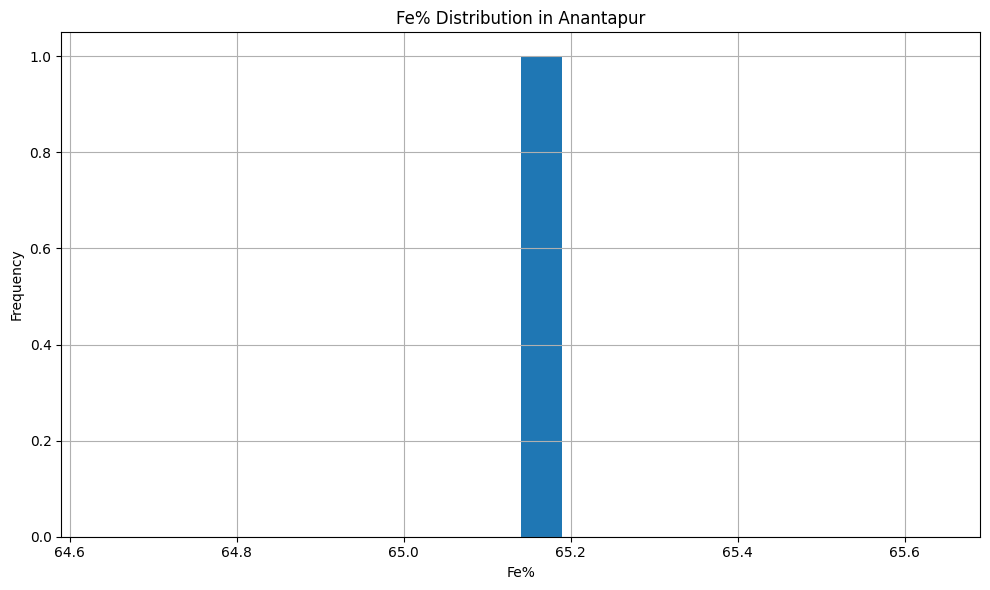

In [78]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data\soil.csv')

# Print available districts
print("Available Districts:")
districts = df['District '].unique()
for i, district in enumerate(districts, 1):
    print(f"{i}. {district}")

# Prompt for district selection
while True:
    try:
        district_index = int(input("\nSelect District Number: ")) - 1
        selected_district = districts[district_index]
        break
    except (ValueError, IndexError):
        print("Invalid selection. Try again.")

# Mineral fields
mineral_fields = ['S%', 'Mn%', 'Cu%', 'Fe%', 'Zn%', 'B%']

# Print available minerals
print("\nAvailable Minerals:")
for i, mineral in enumerate(mineral_fields, 1):
    print(f"{i}. {mineral}")

# Prompt for mineral selection
while True:
    try:
        mineral_index = int(input("\nSelect Mineral Number: ")) - 1
        selected_mineral = mineral_fields[mineral_index]
        break
    except (ValueError, IndexError):
        print("Invalid selection. Try again.")

# Filter data for selected district and mineral
district_data = df[df['District '] == selected_district]

# Prepare results
results = {}
try:
    results = {
        'District': selected_district,
        'Mineral': selected_mineral,
        'Mean': district_data[selected_mineral].mean(),
        'Median': district_data[selected_mineral].median(),
        'Min': district_data[selected_mineral].min(),
        'Max': district_data[selected_mineral].max(),
        'Standard Deviation': district_data[selected_mineral].std()
    }
except KeyError:
    print(f"Error: Mineral column '{selected_mineral}' not found.")
    print("Available columns:", list(district_data.columns))

# Display results
print("\n--- Mineral Analysis Results ---")
for key, value in results.items():
    print(f"{key}: {value}")

# Optional: Visualize distribution
try:
    plt.figure(figsize=(10,6))
    district_data[selected_mineral].hist(bins=20)
    plt.title(f'{selected_mineral} Distribution in {selected_district}')
    plt.xlabel(selected_mineral)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization: {e}")
    print("Unable to create histogram. Check data type and column.")

In [79]:
import pandas as pd
import numpy as np

# Organized districts by state
state_districts = {
    'Punjab': [
        'Tarn Taran', 'Khadoor Sahib', 'Gandiwind', 'Chohla Sahib', 
        'Naushehra Pannuan', 'Valtoha', 'Jandiala', 'Patti', 
        'Patiala', 'Shahid Bhagat Singh Nagar', 'Ludhiana', 'Sirsa'
    ],
    'Uttar Pradesh': [
        'Fathepur', 'Chitrakoot', 'Sonbhadra', 'Chandauli', 
        'Jaunpur', 'Karnal'
    ],
    'Bihar': [
        'Patna', 'Gaya', 'Nalanda', 'Aurangabad', 'Rohtas', 'Kaimur', 
        'Buxar', 'Bhojpur', 'Saran', 'Siwan', 'Gopalganj', 
        'East Champaran', 'West Champaran', 'Sitamarhi', 'Madhubani', 
        'Supaul', 'Araria', 'Kishanganj', 'Purnia', 'Katihar', 
        'Bhagalpur', 'Banka', 'Munger', 'Khagaria', 'Begusarai', 
        'Samastipur', 'Darbhanga', 'Muzaffarpur', 'Vaishali', 
        'Lakhimpur', 'Nalbari', 'Barpeta'
    ],
    'Maharashtra': [
        'Nagpur', 'Wardha', 'Amravati', 'Yavatmal', 'Buldhana', 
        'Akola', 'Washim', 'Ahmednagar', 'Sangli', 'Solapur', 
        'Satara', 'Kolhapur', 'Pune', 'Nashik', 'Jalgaon', 
        'Aurangabad', 'Nanded', 'Latur', 'Osmanabad', 'Parbhani', 
        'Hingoli', 'Bhandara', 'Gondia', 'Chandrapur', 'Gadchiroli', 
        'Nandurbar', 'Dhule', 'Jalna', 'Beed', 'Lakhimpur Kheri'
    ],
    'Karnataka': [
        'Bidar', 'Belagavi', 'Vijayapura', 'Kalaburagi', 'Bagalkote', 
        'Raichur', 'Koppal', 'Gadag', 'Haveri', 'Dharwad', 
        'Uttara Kannada', 'Dakshina Kannada', 'Udupi', 'Shivamogga', 
        'Chitradurga', 'Davanagere', 'Ballari', 'Chikkamagaluru', 
        'Hassan', 'Kodagu', 'Mandya', 'Mysuru', 'Chamarajanagar', 
        'Bengaluru Urban', 'Bengaluru Rural', 'Ramanagara', 
        'Kolar', 'Chikkaballapura', 'Tumkur'
    ],
    'Gujarat': ['Vadodara', 'Panchmahal'],
    'Telangana': ['Nalgonda', 'East Godavari']
}

# Nutrient data dictionary (as in previous code)
nutrient_data = {
    # [Previous nutrient_data dictionary remains the same]
}

def add_nutrient_data(df):
    """
    Add nutrient data to the dataframe based on district and state
    """
    # Create new columns for each nutrient
    for nutrient in nutrient_data.keys():
        df[f'{nutrient} Status'] = df.apply(
            lambda row: next(
                (status for state, status in nutrient_data[nutrient].items() 
                 if state.lower() in row['State'].lower() or 
                 (row['District'] in state_districts.get(state, []))),
                'No specific data'
            ), 
            axis=1
        )
    return df

# Prepare dataframe with state column
def prepare_dataframe():
    # Create a list of all rows
    rows = []
    for state, districts in state_districts.items():
        for district in districts:
            rows.append({'State': state, 'District': district})
    
    # Convert to DataFrame
    df = pd.DataFrame(rows)
    return df

# Main execution
def main():
    # Create initial dataframe
    df = prepare_dataframe()
    
    # Add nutrient data
    df_with_nutrients = add_nutrient_data(df)
    
    # Display the dataframe
    print(df_with_nutrients)
    
    # Optional: Save to CSV
    df_with_nutrients.to_csv('state_districts_nutrients.csv', index=False)
    
    # Summarize nutrient status by state
    nutrient_summary = df_with_nutrients.groupby('State').agg({
        f'{nutrient} Status': 'first' for nutrient in nutrient_data.keys()
    })
    print("\nNutrient Status Summary by State:")
    print(nutrient_summary)

# Run the main function
if __name__ == '__main__':
    main()

         State           District
0       Punjab         Tarn Taran
1       Punjab      Khadoor Sahib
2       Punjab          Gandiwind
3       Punjab       Chohla Sahib
4       Punjab  Naushehra Pannuan
..         ...                ...
108  Karnataka             Tumkur
109    Gujarat           Vadodara
110    Gujarat         Panchmahal
111  Telangana           Nalgonda
112  Telangana      East Godavari

[113 rows x 2 columns]


ValueError: No objects to concatenate

In [84]:
import pandas as pd
import numpy as np

# State-District Mapping
state_districts = {
    'Punjab': [
        'Tarn Taran', 'Khadoor Sahib', 'Gandiwind', 'Chohla Sahib', 
        'Naushehra Pannuan', 'Valtoha', 'Jandiala', 'Patti', 
        'Patiala', 'Shahid Bhagat Singh Nagar', 'Ludhiana', 'Sirsa'
    ],
    'Uttar Pradesh': [
        'Fathepur', 'Chitrakoot', 'Sonbhadra', 'Chandauli', 
        'Jaunpur', 'Karnal'
    ],
    'Bihar': [
        'Patna', 'Gaya', 'Nalanda', 'Aurangabad', 'Rohtas', 'Kaimur', 
        'Buxar', 'Bhojpur', 'Saran', 'Siwan', 'Gopalganj', 
        'East Champaran', 'West Champaran', 'Sitamarhi', 'Madhubani', 
        'Supaul', 'Araria', 'Kishanganj', 'Purnia', 'Katihar', 
        'Bhagalpur', 'Banka', 'Munger', 'Khagaria', 'Begusarai', 
        'Samastipur', 'Darbhanga', 'Muzaffarpur', 'Vaishali', 
        'Lakhimpur', 'Nalbari', 'Barpeta'
    ],
    'Maharashtra': [
        'Nagpur', 'Wardha', 'Amravati', 'Yavatmal', 'Buldhana', 
        'Akola', 'Washim', 'Ahmednagar', 'Sangli', 'Solapur', 
        'Satara', 'Kolhapur', 'Pune', 'Nashik', 'Jalgaon', 
        'Aurangabad', 'Nanded', 'Latur', 'Osmanabad', 'Parbhani', 
        'Hingoli', 'Bhandara', 'Gondia', 'Chandrapur', 'Gadchiroli', 
        'Nandurbar', 'Dhule', 'Jalna', 'Beed', 'Lakhimpur Kheri'
    ],   
    'Karnataka': [
        'Bidar', 'Belagavi', 'Vijayapura', 'Kalaburagi', 'Bagalkote', 
        'Raichur', 'Koppal', 'Gadag', 'Haveri', 'Dharwad', 
        'Uttara Kannada', 'Dakshina Kannada', 'Udupi', 'Shivamogga', 
        'Chitradurga', 'Davanagere', 'Ballari', 'Chikkamagaluru', 
        'Hassan', 'Kodagu', 'Mandya', 'Mysuru', 'Chamarajanagar', 
        'Bengaluru Urban', 'Bengaluru Rural', 'Ramanagara', 
        'Kolar', 'Chikkaballapura', 'Tumkur'
    ],
    'Gujarat': ['Vadodara', 'Panchmahal'],
    'Telangana': ['Nalgonda', 'East Godavari']
}

# Detailed Nutrient Data with District-Specific Information
nutrient_data = {
    'Sulfur (S)': {
        'Punjab': {
            '_state_summary': 'In 2024-25, percentage of soils high in organic carbon has decreased',
            'Tarn Taran': 'Typical sulfur deficiency patterns in alluvial soils',
            'Ludhiana': 'Moderate sulfur availability in agricultural lands',
        },
        'Uttar Pradesh': {
            '_state_summary': 'By 2016, ~70% soil samples with <8 ppm sulfate-sulfur',
            'Fathepur': 'Low sulfur content in agricultural soils',
            'Jaunpur': 'Marginal sulfur availability in cultivated areas',
        },
        'Bihar': {
            '_state_summary': 'Sulfur deficiency in alluvial soils: 23-31%',
            'Patna': 'Urban and peri-urban soil sulfur challenges',
            'Gaya': 'Varied sulfur content in agricultural regions',
        },
        'Maharashtra': {
            '_state_summary': 'Salinization affecting 44% of area, impacting sulfur availability',
            'Nagpur': 'Urban soil sulfur concentration variations',
            'Pune': 'Agricultural sulfur status in diverse terrains',
        },
        'Karnataka': {
            '_state_summary': 'Average soil sulfur deficiency: 11.4% acute, 29.4% deficient, 17.8% latent',
            'Bengaluru Urban': 'Urban soil sulfur characteristics',
            'Mysuru': 'Agricultural sulfur content in diverse landscapes',
        }
    },
    'Boron (B)': {
        'Punjab': {
            '_state_summary': 'Available boron: 0.26-0.78 mg/kg (aridic), 0.38-0.84 mg/kg (ustic)',
            'Tarn Taran': 'Boron concentration variations in agricultural soils',
            'Ludhiana': 'Post-harvest boron content in crop lands',
        },
    },
}

def add_nutrient_data(df):
    """Add detailed nutrient data to the dataframe"""
    for nutrient in nutrient_data.keys():
        df[f'{nutrient} Status'] = df.apply(
            lambda row: next(
                (details.get(row['District'], details.get('_state_summary', 'Limited data available'))
                 for state, details in nutrient_data[nutrient].items()
                 if state == row['State']),
                'Limited data available'
            ),
            axis=1
        )
    return df

def prepare_dataframe():
    """Prepare dataframe with state and district columns"""
    rows = []
    for state, districts in state_districts.items():
        for district in districts:
            rows.append({'State': state, 'District': district})
    return pd.DataFrame(rows)

def main():
    # Create initial dataframe
    df = prepare_dataframe()
    
    # Add nutrient data
    df_with_nutrients = add_nutrient_data(df)
    
    # Display the dataframe
    print(df_with_nutrients)
    
    # Optional: Save to CSV
    df_with_nutrients.to_csv('district_nutrient_details.csv', index=False)
    
    # Summarize nutrient status by state
    nutrient_summary = df_with_nutrients.groupby('State').agg({
        f'{nutrient} Status': 'first' for nutrient in nutrient_data.keys()
    })
    print("\nNutrient Status Summary by State:")
    print(nutrient_summary)

# Run the main function
if __name__ == '__main__':
    main()

         State           District  \
0       Punjab         Tarn Taran   
1       Punjab      Khadoor Sahib   
2       Punjab          Gandiwind   
3       Punjab       Chohla Sahib   
4       Punjab  Naushehra Pannuan   
..         ...                ...   
108  Karnataka             Tumkur   
109    Gujarat           Vadodara   
110    Gujarat         Panchmahal   
111  Telangana           Nalgonda   
112  Telangana      East Godavari   

                                     Sulfur (S) Status  \
0    Typical sulfur deficiency patterns in alluvial...   
1    In 2024-25, percentage of soils high in organi...   
2    In 2024-25, percentage of soils high in organi...   
3    In 2024-25, percentage of soils high in organi...   
4    In 2024-25, percentage of soils high in organi...   
..                                                 ...   
108  Average soil sulfur deficiency: 11.4% acute, 2...   
109                             Limited data available   
110                             L